In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [2]:
#checking the library versions
print('pandas version :',pd.__version__)
print('matplotlib version :',matplotlib.__version__)
print('seaborn version :',sns.__version__)

pandas version : 1.5.3
matplotlib version : 3.7.0
seaborn version : 0.12.2


In [4]:
data=pd.read_csv("datasets\\bankChurn.csv")

In [4]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000


In [5]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio'],
      dtype='object')

In [6]:
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,8395,62,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,10294,61,0.189


In [7]:
data.shape

(10127, 19)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10034 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             9995 non-null   object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10067 non-null  float64
 14  Total_

In [9]:
data.isnull().sum() #finding missing values

CLIENTNUM                     0
Attrition_Flag                0
Customer_Age                  0
Gender                       93
Dependent_count               0
Education_Level               0
Marital_Status                0
Income_Category               0
Card_Category               132
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                 60
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Trans_Amt               0
Total_Trans_Ct                0
Avg_Utilization_Ratio         0
dtype: int64

In [10]:
#Level 1 Analysis
#Categorize the columns into categorical and numerical

In [11]:
#numerical columns

numerical=data.select_dtypes(include=['int64','float64'])

In [12]:
#categorical columns
categorical =data.select_dtypes(exclude=['int64','float64'])

In [13]:
#create a function which will check missing values , unique values and mode

def categorical(col):
    print(f'Number of Unique values in {col} is {data[col].unique()}')
    print(f'Missing values in {col} is {data[col].isnull().sum()}')
    print(f'Mode of {col} is {data[col].mode()[0]}')

# 1.Analysis of Target Variable('Attrition_Flag')

In [14]:
categorical('Attrition_Flag')

Number of Unique values in Attrition_Flag is ['Existing Customer' 'Attrited Customer']
Missing values in Attrition_Flag is 0
Mode of Attrition_Flag is Existing Customer


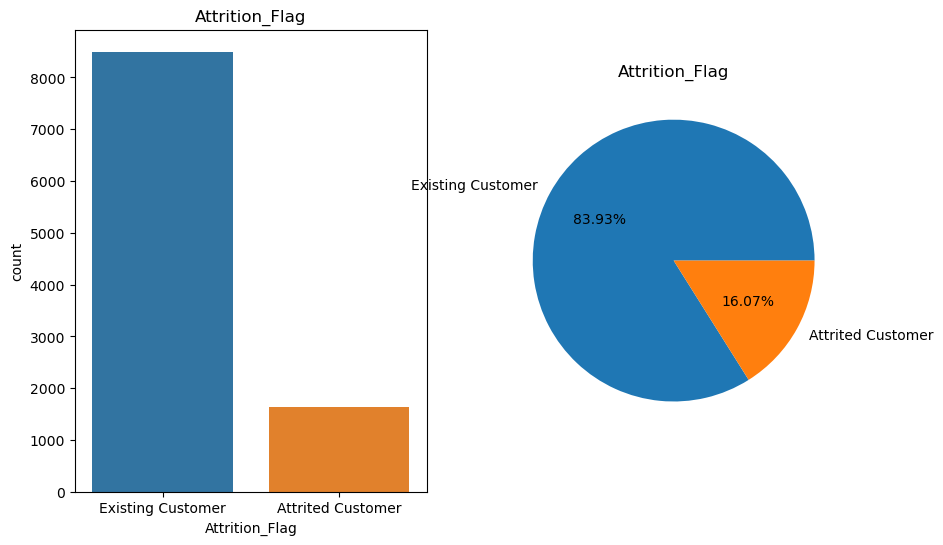

In [5]:
#Visual representation of Attrition_Flag

fig,ax=plt.subplots(1,2,figsize=(10,6))
ax[0].set_title('Attrition_Flag')
ax[1].set_title('Attrition_Flag')

percentage=data.Attrition_Flag.value_counts()

sns.countplot(x=data.Attrition_Flag,ax=ax[0])
plt.pie(percentage, labels=percentage.index , autopct='%0.2f%%');

In [6]:
percentage

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

# 2.Analysis of Gender

In [19]:
categorical('Gender')

Number of Unique values in Gender is ['M' 'F' nan]
Missing values in Gender is 93
Mode of Gender is F


In [20]:
data.Gender.fillna('Not_disclosed',inplace=True)

In [21]:
categorical('Gender')

Number of Unique values in Gender is ['M' 'F' 'Not_disclosed']
Missing values in Gender is 0
Mode of Gender is F


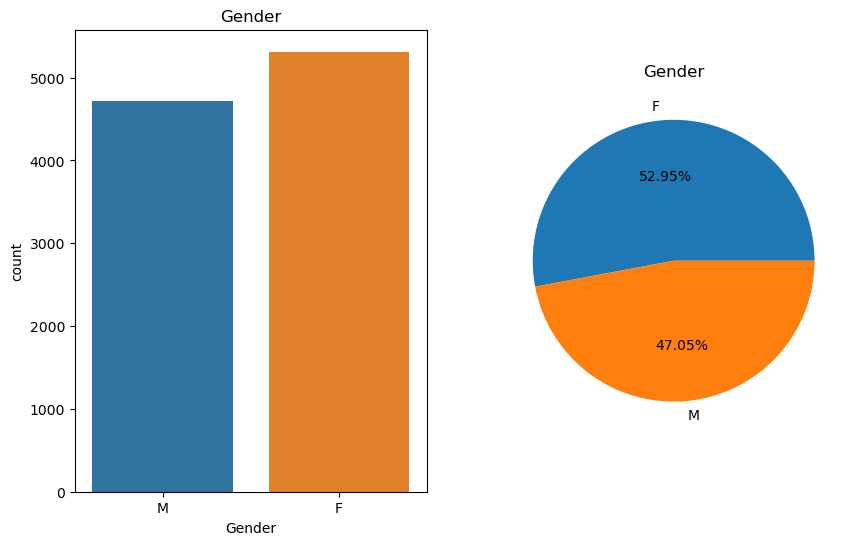

In [8]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
ax[0].set_title('Gender')
ax[1].set_title('Gender')

percentage=data.Gender.value_counts()

sns.countplot(x=data.Gender,ax=ax[0])
plt.pie(percentage, labels=percentage.index , autopct='%0.2f%%');

***Women customers are more than men and 1% of customers haven't diclosed their gender

In [25]:
#Analysis of Education level

In [26]:
categorical("Education_Level")

Number of Unique values in Education_Level is ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Missing values in Education_Level is 0
Mode of Education_Level is Graduate


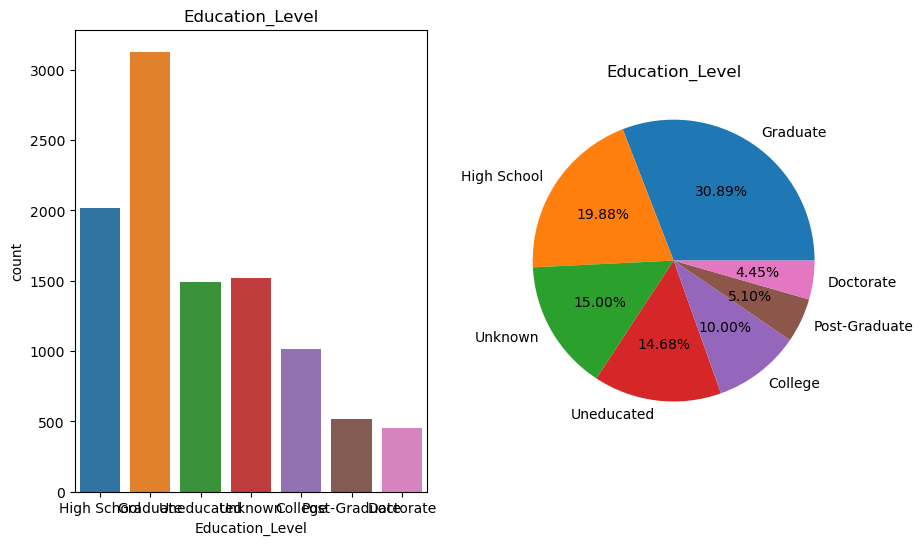

In [35]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
ax[0].set_title('Education_Level')
ax[1].set_title('Education_Level')

percentage=data.Education_Level.value_counts()

sns.countplot(x=data.Education_Level,ax=ax[0])
plt.pie(percentage, labels=percentage.index , autopct='%0.2f%%');

In [36]:
categorical('Marital_Status')

Number of Unique values in Marital_Status is ['Married' 'Single' 'Unknown' 'Divorced']
Missing values in Marital_Status is 0
Mode of Marital_Status is Married


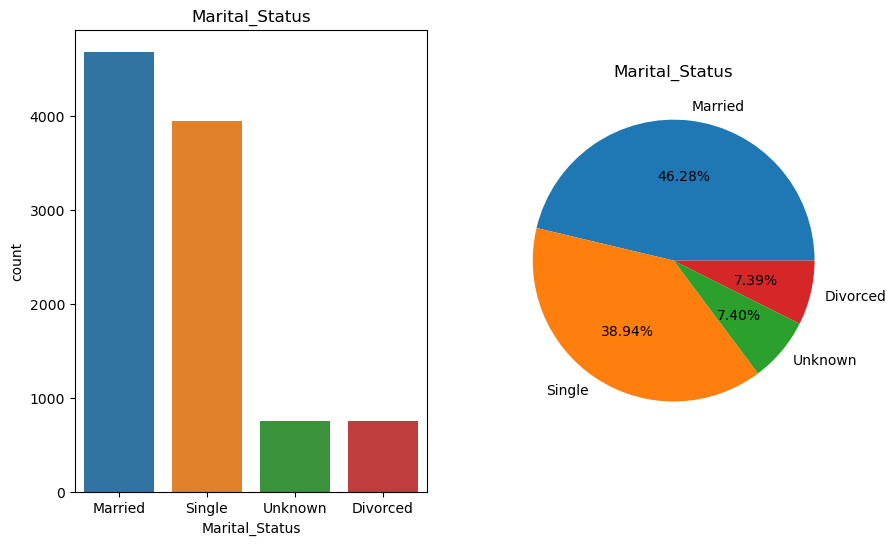

In [37]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
ax[0].set_title('Marital_Status')
ax[1].set_title('Marital_Status')

percentage=data.Marital_Status.value_counts()

sns.countplot(x=data.Marital_Status,ax=ax[0])
plt.pie(percentage, labels=percentage.index , autopct='%0.2f%%');

In [38]:
categorical("Income_Category")

Number of Unique values in Income_Category is ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Missing values in Income_Category is 0
Mode of Income_Category is Less than $40K


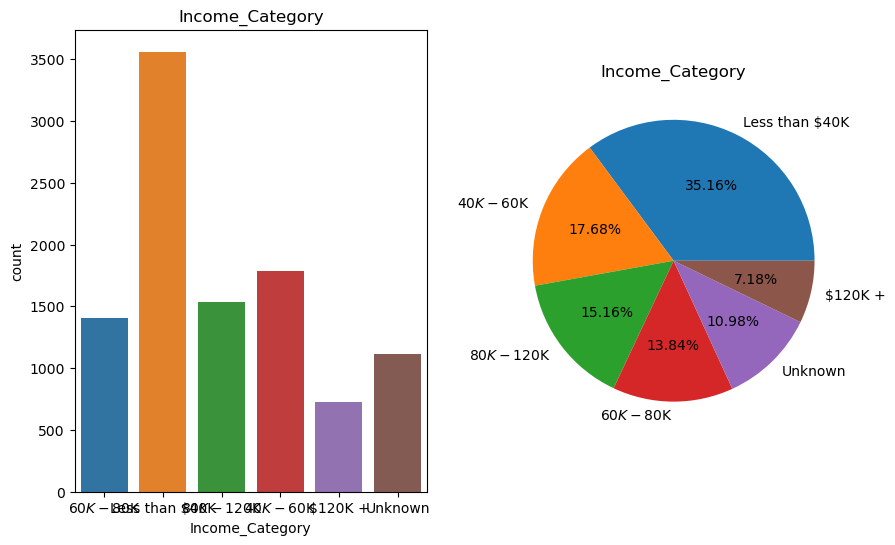

In [40]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
ax[0].set_title('Income_Category')
ax[1].set_title('Income_Category')

percentage=data.Income_Category.value_counts()

sns.countplot(x=data.Income_Category,ax=ax[0])
plt.pie(percentage, labels=percentage.index , autopct='%0.2f%%');

In [41]:
categorical('Card_Category')

Number of Unique values in Card_Category is ['Blue' 'Gold' 'Silver' nan 'Platinum']
Missing values in Card_Category is 132
Mode of Card_Category is Blue


In [44]:
data.Card_Category.fillna('Blue',inplace=True)

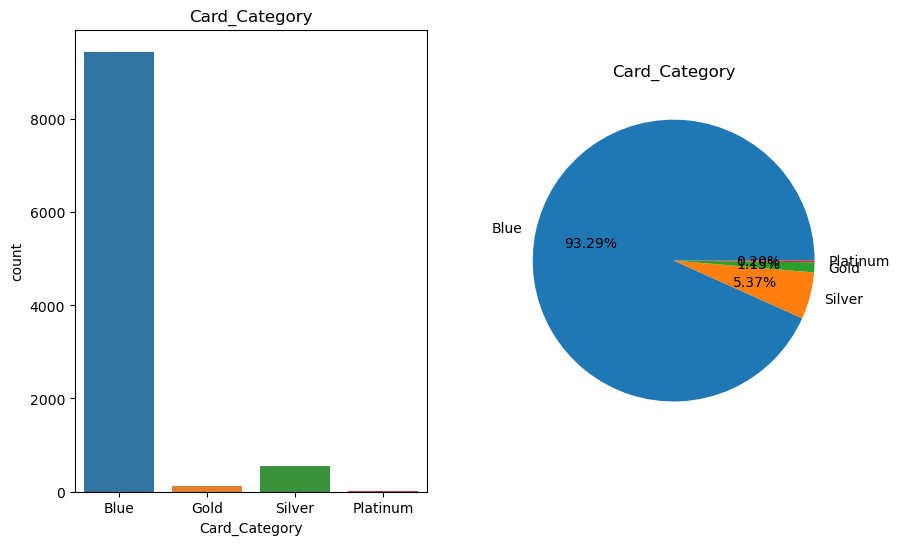

In [45]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
ax[0].set_title('Card_Category')
ax[1].set_title('Card_Category')

percentage=data.Card_Category.value_counts()

sns.countplot(x=data.Card_Category,ax=ax[0])
plt.pie(percentage, labels=percentage.index , autopct='%0.2f%%');

In [27]:
#Analysis of Numerical Data

In [28]:
def numerical(col):
    print(f'Mean of {col} is {data[col].mean()}')
    print(f'Median of {col} is {data[col].median()}')
    print(f'Mode of {col} is {data[col].mode()}')
    print(f'Standard deviation of {col} is {data[col].std()}')
    print(f'Number of missing values of {col} is {data[col].isnull().sum()}')

In [29]:
#Analysis of Age

In [30]:
numerical('Customer_Age')

Mean of Customer_Age is 47.285276982324476
Median of Customer_Age is 46.0
Mode of Customer_Age is 0    44
Name: Customer_Age, dtype: int64
Standard deviation of Customer_Age is 13.270923260536502
Number of missing values of Customer_Age is 0


<Axes: >

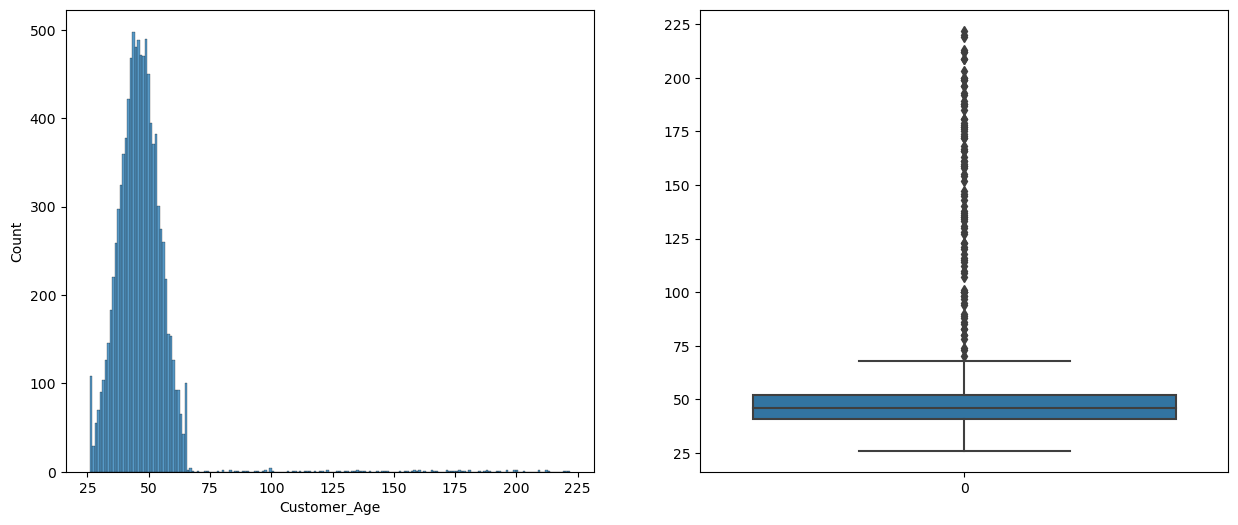

In [32]:
#distribution of customer age

fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.histplot(data['Customer_Age'],ax=ax[0])
sns.boxplot(data['Customer_Age'],ax=ax[1])

In [33]:
x=data[data.Customer_Age>75].index

for index in x:
    data.loc[index,'Customer_Age']=data.Customer_Age.median()

<Axes: >

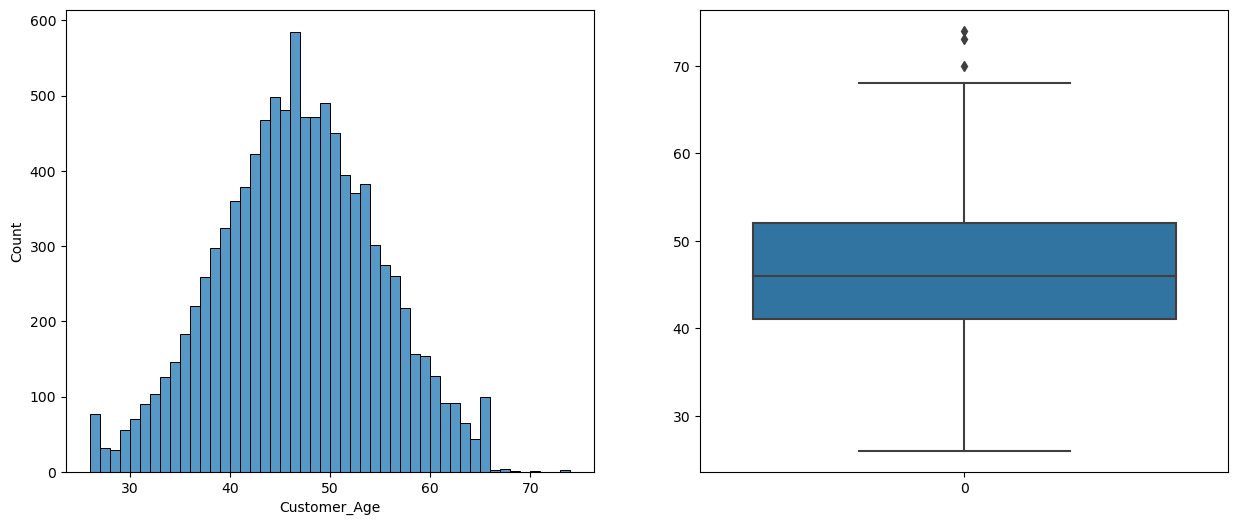

In [34]:
#distribution of customer age

fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.histplot(data['Customer_Age'],ax=ax[0])
sns.boxplot(data['Customer_Age'],ax=ax[1])

In [46]:
numerical('Dependent_count')

Mean of Dependent_count is 2.7874000197491853
Median of Dependent_count is 2.0
Mode of Dependent_count is 0    3
Name: Dependent_count, dtype: int64
Standard deviation of Dependent_count is 6.479134929706418
Number of missing values of Dependent_count is 0


TypeError: 'Axes' object is not subscriptable

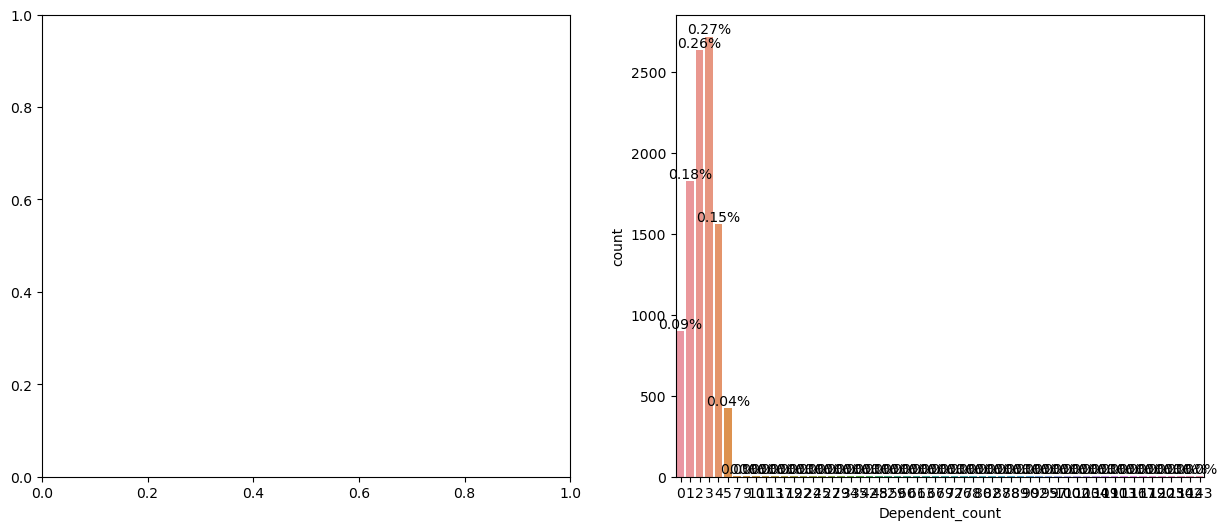

In [11]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
ax=sns.countplot(x=data['Dependent_count'])
for bar in ax.patches:
    percentage=f'{round(bar.get_height() / len(data),2)}%'
    x=bar.get_x() + bar.get_width() /2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),va='bottom',ha='center')
sns.boxplot(y=data['Dependent_count'],ax=ax[1],color='b') 

In [12]:
#replacing the dependent count > 5 with mean value

x=data[data.Dependent_count >5].index

for index in x:
    data.loc[index,'Dependent_count']=5

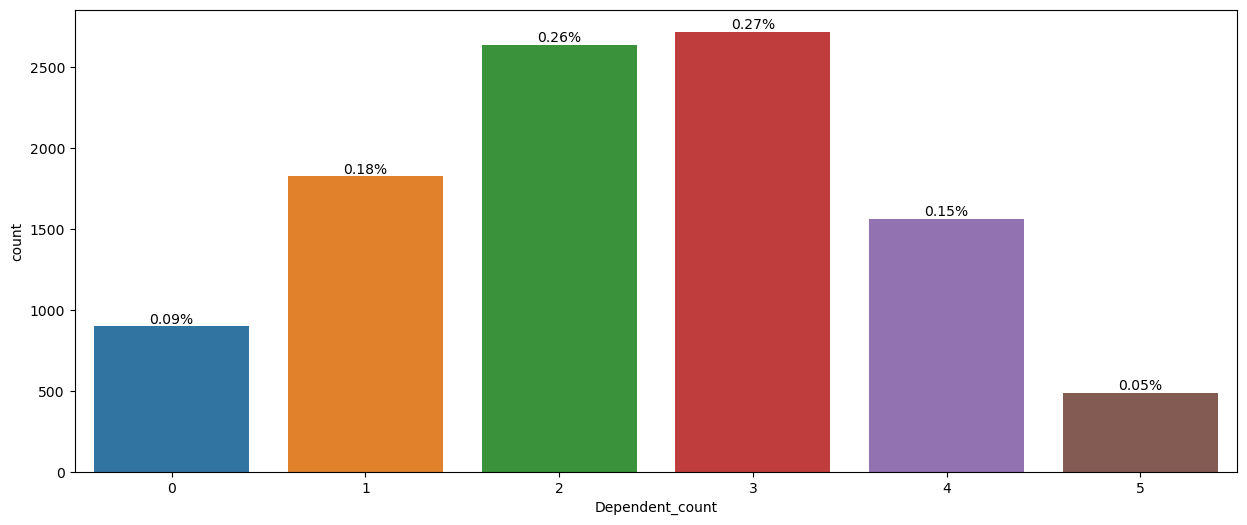

In [60]:
ax=plt.subplots(1,figsize=(15,6))
ax=sns.countplot(x=data['Dependent_count'])
for bar in ax.patches:
    percentage=f'{round(bar.get_height() / len(data),2)}%'
    x=bar.get_x() + bar.get_width() /2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),va='bottom',ha='center')
#sns.boxplot(y=data['Dependent_count'],ax=ax[1],color='b') 


In [64]:
Min=data.Dependent_count.min()
Max=data.Dependent_count.max()
Q1=data.Dependent_count.quantile(0.25) #1st and 3rd quantile
Q3=data.Dependent_count.quantile(0.75)

In [65]:
Min,Max,Q1,Q2

(0, 5, 1.0, 3.0)

In [66]:
#inter quartile range
IQR=Q3-Q1;IQR

2.0

In [68]:
UF=Q3+1.5*IQR
LF=Q1-1.5*IQR


In [70]:
#selecting the data other than outliers i.e removing outliers
DC=data[(data.Dependent_count > LF) & (data.Dependent_count < UF)]

<Axes: >

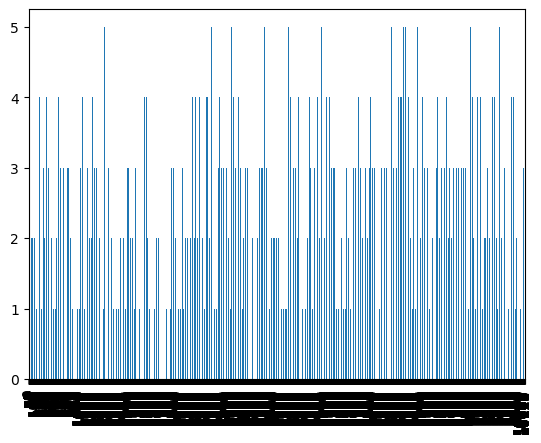

In [71]:
DC.Dependent_count.plot(kind='bar')